In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
print(np.__version__)
sns.set(style="whitegrid")


2.2.0


In [2]:
# !pip install xgboost lime

In [3]:
# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Filter to "worst" features only
worst_columns = [col for col in df.columns if "worst" in col]
X = df[worst_columns]
y = df["target"]


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM (RBF) Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Decision Tree Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93   

/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:39:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [6]:
from sklearn.model_selection import GridSearchCV

# Store best models
best_models = {}

# 1️⃣ Random Forest Grid Search
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)
best_models['Random Forest'] = rf_grid.best_estimator_
print("\n🔍 Best RF Parameters:", rf_grid.best_params_)
print("RF Best CV Score:", rf_grid.best_score_)



🔍 Best RF Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
RF Best CV Score: 0.9604395604395604


In [7]:
# 2️⃣ SVM Grid Search
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
best_models['SVM'] = svm_grid.best_estimator_
print("\n🔍 Best SVM Parameters:", svm_grid.best_params_)
print("SVM Best CV Score:", svm_grid.best_score_)



🔍 Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Best CV Score: 0.9714285714285713


In [8]:
# 3️⃣ XGBoost Grid Search
xgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

xgb_grid = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    xgb_params,
    cv=5,
    scoring='accuracy'
)
xgb_grid.fit(X_train_scaled, y_train)
best_models['XGBoost'] = xgb_grid.best_estimator_
print("\n🔍 Best XGBoost Parameters:", xgb_grid.best_params_)
print("XGBoost Best CV Score:", xgb_grid.best_score_)


/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.13/site-packages/xgboost/trainin


🔍 Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost Best CV Score: 0.956043956043956


/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
# Summary of best models and scores
summary = pd.DataFrame({
    model: {
        'Best Score': round(grid.best_score_, 4),
        'Best Params': grid.best_params_
    }
    for model, grid in zip(['Random Forest', 'SVM', 'XGBoost'], [rf_grid, svm_grid, xgb_grid])
}).T

summary


,Best Score,Best Params
Random Forest,0.9604,"{'max_depth': None, 'min_samples_split': 5, 'n..."
SVM,0.9714,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}"
XGBoost,0.956,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [10]:
print(np.__version__)
import shap


# Use TreeExplainer for tree-based models
shap.initjs()

# Pick best model from tuning step (e.g., XGBoost)
model = best_models["XGBoost"]

# Refit on full training set if needed
model.fit(X_train_scaled, y_train)

# SHAP Explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)


2.2.0


/home/vscode/.local/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [08:40:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


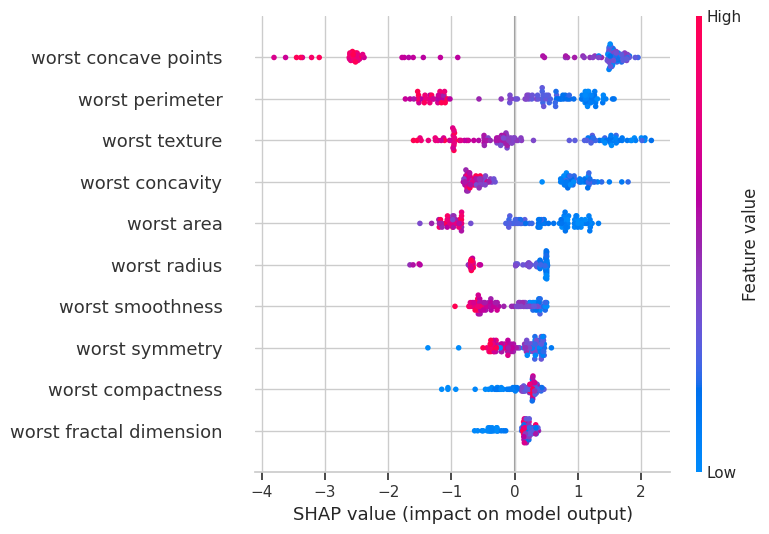

In [11]:
# Summary plot (feature importance across all test samples)
shap.summary_plot(shap_values, features=X_test, feature_names=X.columns)


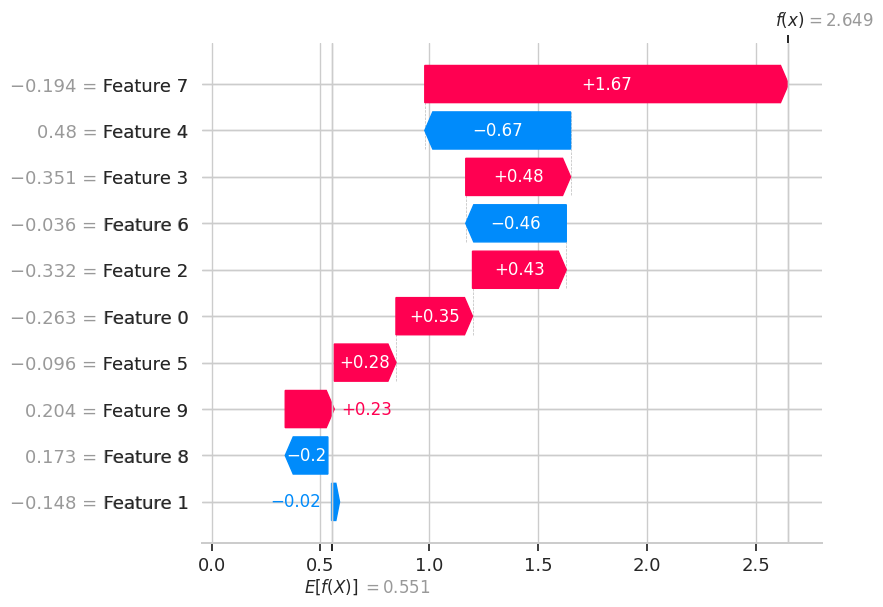

In [12]:
# Explain a single prediction
i = 0  # change index to see other examples
shap.plots.waterfall(shap_values[i], max_display=10)


In [13]:
# Force plot (interactive)
shap.plots.force(shap_values[i])


In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example: Label Encoding (for binary columns)
def label_encode(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        df[col] = encoder.fit_transform(df[col])
    return df

# Example: One-Hot Encoding (for nominal categories)
def one_hot_encode(df, columns):
    return pd.get_dummies(df, columns=columns, drop_first=True)


In [20]:
# Example usage (if you had any object columns)
cat_cols = df.select_dtypes(include='object').columns.tolist()
if cat_cols:
    df = one_hot_encode(df, cat_cols)
